# Insper - Modelagem e Simulação do Mundo Físico

## Atividade - Usando o Tracker para validar um modelo mecânico

---
### Inicialização

Nesta atividade, vamos usar o Tracker para obter dados experimentais da trajetória de um pêndulo simples, validando nosso modelo mecânico.

Antes de começar, execute o código abaixo para importar todas as bibliotecas necessárias.

In [18]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

---
### Implementando o pêndulo conforme você viu no vídeo da aula

#### Item 1

Observe o código a seguir. Nele implementamos o pêndulo que modelamos no vídeo da aula. É um bom momento para esclarecer as suas dúvidas de como conseguimos calcular todas as variáveis que utilizamos nas nossas equações diferenciais.

In [19]:
# Implementação do nosso pêndulo

#parâmetros do nosso modelo
g=9.8 #aceleração da gravidade, em m/s2
r=1 #comprimento do fio, em m
m=1 #massa do pêndulo
𝜌=1.2 # densidade do ar, em kg/m3
Cd=1.05 #coeficiente de arrasto de um paralelepípedo
A=0.08*0.05 #área da seção transversal do pêndulo 
#estimamos a área, mas se tivéssemos nós feito o experimento, teríamos a informação precisa

#Função que implementa o nosso modelo
def Modelo(X, t):
    x=X[0]
    y=X[1]
    vx=X[2]
    vy=X[3]
    
    #calculando seno, cosseno de theta e a velocidade
    sen𝜃=x/sqrt(x**2+y**2)
    cos𝜃=-y/sqrt(x**2+y**2)
    v=sqrt(vx**2+vy**2)
    #checando se a velocidade não é nula, pois há uma divisão por zero nesse código
    if v > 0:
        #calculamos drag e cos e sen de alpha
        D=1/2*𝜌*Cd*A*v**2
        cosα=vx/sqrt(vx**2+vy**2)
        senα=vy/sqrt(vx**2+vy**2) 
    else:
        #no início, a velocidade é nula, e por isso o drag também é nulo
        D=0  
        cosα=0
        senα=0
    #calculando a força de tração    
    T=m*g*cos𝜃+m*v**2/r  
    #por fim, nossas equações diferenciais
    dydt=vy
    dxdt=vx
    dvydt=(T*cos𝜃-D*senα-m*g)/m
    dvxdt=(-T*sen𝜃-D*cosα)/m         
    dXdt=[dxdt, dydt, dvxdt, dvydt]
    return dXdt


#### Item 2

Implemente, na célula a seguir, o código que executa o `odeint` para a função **Modelo**. Utilize:

- Uma lista de tempo de $0$ a $3 \thinspace s$, com $\Delta t=1\cdot 10^{-3}\thinspace s$
- As condições iniciais: $x_0=-0,6\thinspace m$, $y_0=-0,8\thinspace m$, $Vx_0=0\thinspace m/s$ e $Vy_0=0 \thinspace m/s$

Plote três gráficos:

- Gráfico da trajetória do pêndulo
- Gráfico da posição x(t)
- Gráfico da posição y(t)

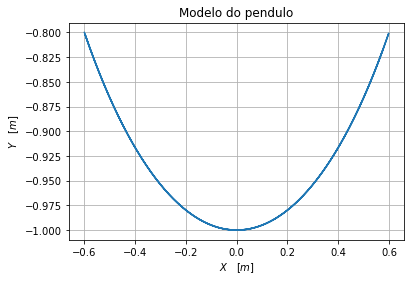

In [20]:
# Implemente seu código do item 2 abaixo

# nossa lista temporal
lisTempo = np.arange(0,3,1e-3)
# Vetor com as condições iniciais
CI = [-0.6,-0.8,0,0]
# executando a odeint
info = odeint(Modelo,CI,lisTempo)
# separando as variávies da matriz gerada
x = info[:,0]
y = info[:,1]
vx = info[:,2]
vy = info[:,3]
#agora é só plotar o gráfico papaizinho 

plt.plot(x,y)
plt.title("Modelo do pendulo")
plt.xlabel('$X \quad [m]$')
plt.ylabel('$Y \quad [m]$')
plt.grid(True)
plt.show()

#### Item 3

Calcule a energia mecânica ao longo de todo o tempo de simulação e valide a **implementação do modelo**. Lembre-se que, ao anularmos a força de arrasto no seu código, a energia mecânica deve se conservar. Plote um gráfico das três energias (cinética, potencial e mecânica) pelo tempo.

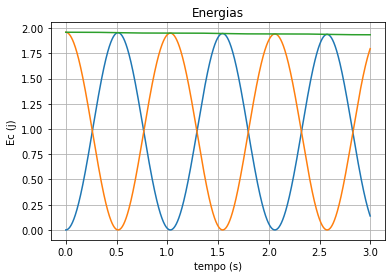

In [21]:
# Implemente seu código do item 3 abaixo
# vamos criar uma nova função para odeint

def Modelo1(X, t):
    x=X[0]
    y=X[1]
    vx=X[2]
    vy=X[3]
    
    #calculando seno, cosseno de theta e a velocidade
    sen𝜃=x/sqrt(x**2+y**2)
    cos𝜃=-y/sqrt(x**2+y**2)
    v=sqrt(vx**2+vy**2)
    #checando se a velocidade não é nula, pois há uma divisão por zero nesse código
    if v > 0:
        #calculamos drag e cos e sen de alpha
        D=0
        cosα=vx/sqrt(vx**2+vy**2)
        senα=vy/sqrt(vx**2+vy**2) 
    else:
        #no início, a velocidade é nula, e por isso o drag também é nulo
        D=0  
        cosα=0
        senα=0
    #calculando a força de tração    
    T=m*g*cos𝜃+m*v**2/r  
    #por fim, nossas equações diferenciais
    dydt=vy
    dxdt=vx
    dvydt=(T*cos𝜃-D*senα-m*g)/m
    dvxdt=(-T*sen𝜃-D*cosα)/m         
    dXdt=[dxdt, dydt, dvxdt, dvydt]
    return dXdt
# essa função não considera a força dissipativa, a força de arrasto

info1 = odeint(Modelo1,CI,lisTempo)
# separando as variávies da matriz gerada
x1 = info[:,0]
y1 = info[:,1]
vx1 = info[:,2]
vy1 = info[:,3]

# tendo as informações agora basta calcular as energias
Ec = []
Ep = []
Em = []

for i in range(0,len(lisTempo)):
    Ec.append(0.5*m*((vx1[i])**2 + (vy1[i])**2))
    Ep.append(m*g*(y1[i]+1))
    Em.append(Ec[i] + Ep[i])

#agora é só plotar o gráfico papaizinho 

plt.plot(lisTempo,Ec)
plt.plot(lisTempo,Ep)
plt.plot(lisTempo,Em)
plt.title("Energias")
plt.xlabel("tempo (s)")
plt.ylabel("Ec (j)")
plt.grid(True)
plt.show()


#### Item 4

Calcule a força de tração do pêndulo para cada instante da lista de tempo, plotando um gráfico da tração pela posição x(t).

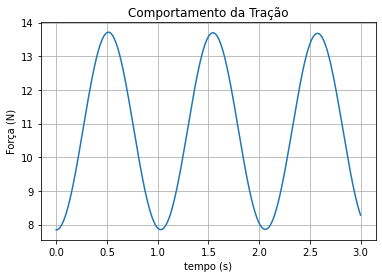

In [24]:
# Implemente seu código do item 4 abaixo
Tracao = []

# vamos calcular a tração com o modelo usando arrasto
for i in range(0,len(lisTempo)):
    cos_teta=-y[i]/sqrt(x[i]**2+y[i]**2)
    Tracao.append(m*g*cos_teta + m*(vx[i]**2 + vy[i]**2)/r)

plt.plot(lisTempo,Tracao)
plt.title("Comportamento da Tração")
plt.xlabel("tempo (s)")
plt.ylabel("Força (N)")
plt.grid(True)
plt.show()


#### Item 5

Vamos agora validar o nosso modelo usando o Tracker. Para isso, siga as instruções:

- Baixe o Tracker em https://physlets.org/tracker/
- Siga as instruções da videoaula usando o vídeo "Pendulo.mov", que você baixou juntamente com essa atividade.
- Gere os pontos de trajetória do pêndulo e exporte para um arquivo ".CSV", conforme instruções da videoaula.
- Use o código fornecido no video para importar o arquivo ".CSV" e validar o modelo plotando os gráficos x(t), y(t) e y(x) - gráfico da trajetória. Lembre-se que você não precisa rodar o `odeint` novamente. Basta plotar seus resultados nos mesos gráficos em que plotar os dados experimentais.


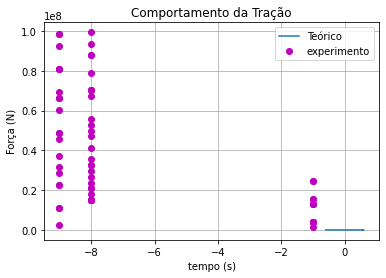

In [27]:
# Implemente seu código do item 5 abaixo

import pandas

colunas = ["t","x","y","vx","vy"]
data = pandas.read_csv("pendulo.csv",names = colunas)

te = data.t.tolist()
xe = data.x.tolist()
ye = data.y.tolist()
vxe = data.vx.tolist()
vye = data.vy.tolist()


plt.title("Comportamento da Tração")
plt.plot(x,y, label = "Teórico")
plt.plot(xe,ye, "mo", label = "experimento")
plt.legend()
plt.xlabel("tempo (s)")
plt.ylabel("Força (N)")
plt.grid(True)
plt.show()


